In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [3]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


- holiday Categorical US National holidays plus regional holiday, Minnesota State Fair
- temp Numeric Average temp in kelvin
- rain_1h Numeric Amount in mm of rain that occurred in the hour
- snow_1h Numeric Amount in mm of snow that occurred in the hour
- clouds_all Numeric Percentage of cloud cover
- weather_main Categorical Short textual description of the current weather
- weather_description Categorical Longer textual description of the current weather
- date_time DateTime Hour of the data collected in local CST time
- traffic_volume Numeric Hourly I-94 ATR 301 reported westbound traffic volume

The metro station is here

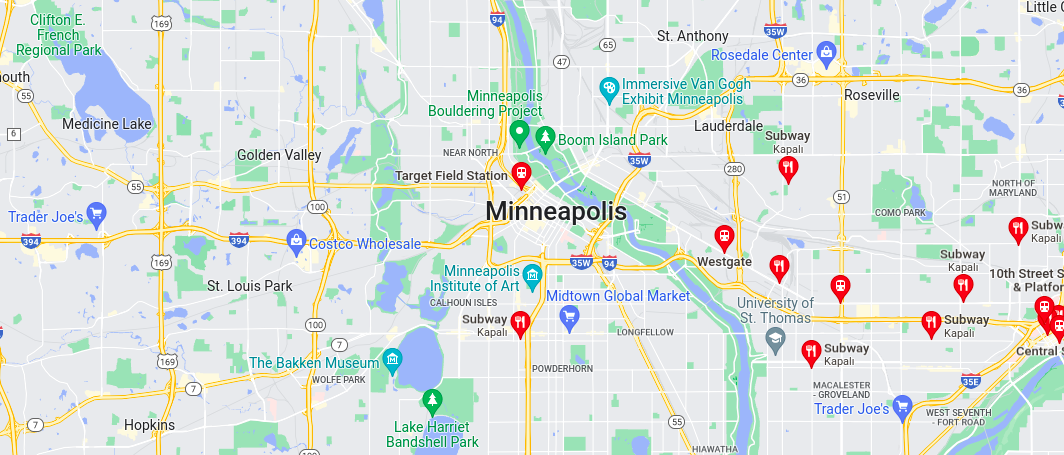

In [70]:
print(f"There are {df.isnull().any().sum()} NaN values.")

There are 0 NaN values.


In [4]:
df.holiday.unique()

array(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [5]:
holiday = df.holiday.apply(lambda x: 1 if x=="None" else 0)
holiday.value_counts()

1    48143
0       61
Name: holiday, dtype: int64

In [6]:
df["holiday_binary"] = df.holiday.apply(lambda x: "Not Holiday" if x=="None" else "Holiday").values

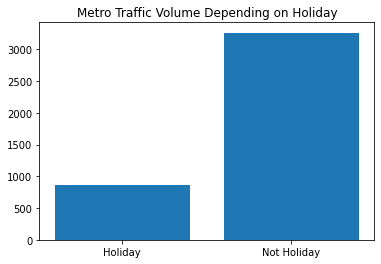

In [7]:
plt.bar(df.groupby("holiday_binary")["traffic_volume"].mean().keys(), 
        df.groupby("holiday_binary")["traffic_volume"].mean().values)
plt.title("Metro Traffic Volume Depending on Holiday")
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
 9   holiday_binary       48204 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 3.7+ MB


In [11]:
df["date_time"] = pd.to_datetime(df["date_time"])

In [15]:
df.index = df["date_time"]
df.index.name = ""
df.drop("date_time", axis=1, inplace=True)

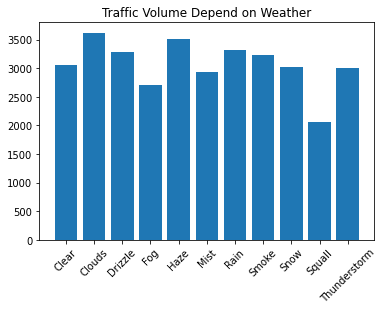

In [27]:
plt.bar(df.groupby("weather_main")["traffic_volume"].mean().keys(),
         df.groupby("weather_main")["traffic_volume"].mean().values)
plt.xticks(rotation=45)
plt.title("Traffic Volume Depend on Weather")
plt.show()

In [29]:
# Look at temperature -> C = K - 273.15  kelvin to celsius

df["temp_celsius"] = df["temp"] - 273.15

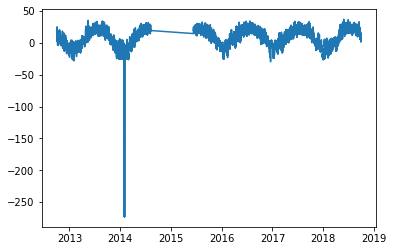

In [31]:
# I see here an wrong value.

plt.plot(df["temp_celsius"])

In [44]:
# There are missing wrong 

df[(df["temp_celsius"]<-30)].shape

(10, 10)

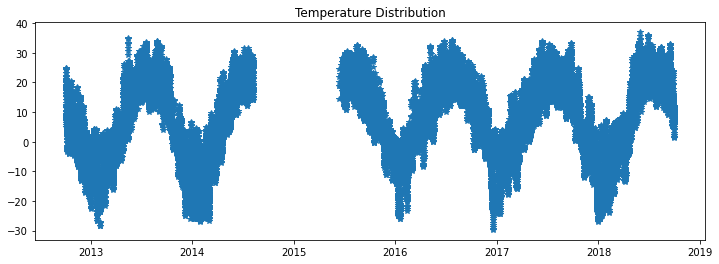

In [57]:
plt.figure(figsize=(12,4))
plt.plot(df[~(df["temp_celsius"]<-30)]["temp_celsius"], "*")
plt.title("Temperature Distribution")
plt.show()

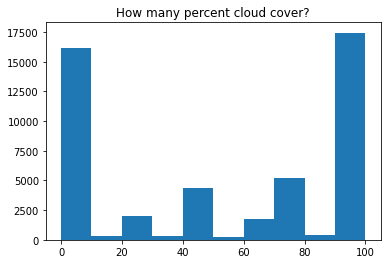

In [97]:
plt.hist(df["clouds_all"],bins=10)
plt.title("How many percent cloud cover?")
plt.show()

Correlation

In [81]:
import seaborn as sns

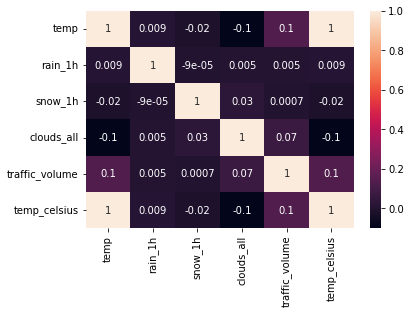

In [91]:
correlation = df.corr()

sns.heatmap(correlation, annot=True, fmt=".1g")
plt.show()

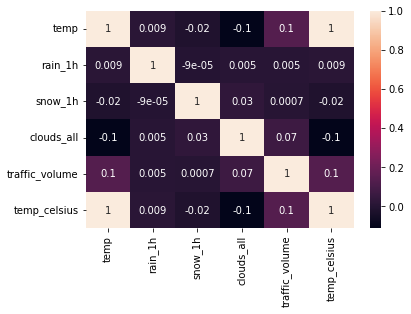

In [92]:
correlation = df[~(df["temp_celsius"]<-30)].corr()

sns.heatmap(correlation, annot=True, fmt=".1g")
plt.show()

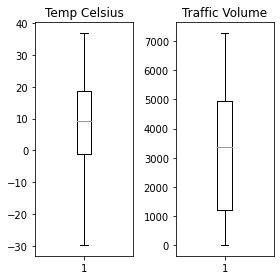

In [109]:
fig, ax = plt.subplots(1, 2, figsize=(4,4))

ax[0].boxplot(df[~(df["temp_celsius"]<-30)]["temp_celsius"])
ax[0].set_title("Temp Celsius")

ax[1].boxplot(df[~(df["temp_celsius"]<-30)]["traffic_volume"])
ax[1].set_title("Traffic Volume")

plt.tight_layout()
plt.show()